* [機器學習(scikit-learn) --Logistic Regression](https://to52016.pixnet.net/blog/post/343519054-%5Bpython%5D-logistic-regression%28%E7%BE%85%E5%90%89%E6%96%AF%E8%BF%B4%E6%AD%B8%29)
* [machine learning 下的 Logistic Regression 實作(使用python)](https://medium.com/@jacky308082/machine-learning-%E4%B8%8B%E7%9A%84-logistic-regression-%E5%AF%A6%E4%BD%9C-%E4%BD%BF%E7%94%A8python-d19b971ff9dc)
* [第3.3講：線性分類-邏輯斯回歸(Logistic Regression) 介紹](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-3%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E9%82%8F%E8%BC%AF%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-%E4%BB%8B%E7%B4%B9-a1a5f47017e5)
* [第3.5講 : 決策樹(Decision Tree)以及隨機森林(Random Forest)介紹](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)
* [關於使用sklearn進行數據預處理—— 歸一化/標準化/正則化](https://www.cnblogs.com/chaosimple/p/4153167.html)
* [Python中的fit(),transform()區別](https://zhuanlan.zhihu.com/p/42297868)

In [11]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
from keras.datasets import mnist

Using TensorFlow backend.


In [25]:
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  

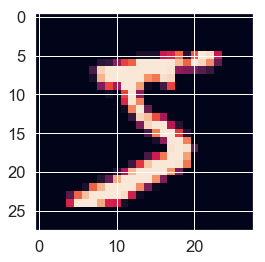

In [27]:
plt.imshow(X_Train[0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler#可以直接將給定數據進行標準化。
sc = StandardScaler()
sc.fit(X_train,y_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
from sklearn.linear_model  import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_std,y_train)


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr.score(X_test,y_test)

1.0

In [17]:
lr.score(X_test_std,y_test)

1.0

In [18]:
# 印出係數
print(lr.coef_)
# 印出截距
print(lr.intercept_ )

[[0.53267325 2.96294977]]
[0.29577793]


In [19]:
#機率分類判斷
import numpy as np
np.round(lr.predict_proba(X_test_std))

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

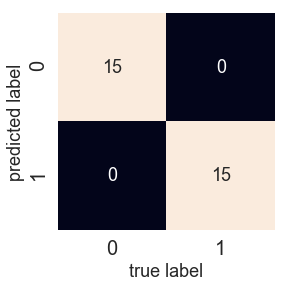

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, lr.predict(X_test_std))
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');